In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

from genetic_selection import GeneticSelectionCV

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.decomposition import PCA

# Dados Veltec

In [144]:
dfVeltec = pd.read_csv("./vigencias_scores.csv")

In [145]:
dfVeltec = dfVeltec.drop(["id_vei", "id_uo_vei", "id_motorista", "id_uo_motorista", "score_geral"], axis = 1)

In [146]:
dfVeltec["rank"].unique()
dfVeltec["rank"].value_counts()

otimo      7729
ruim       2369
bom         992
regular     960
pessimo     592
Name: rank, dtype: int64

In [147]:
dfVeltecOtimo = dfVeltec.loc[dfVeltec["rank"] == "otimo"]
dfVeltecBom = dfVeltec.loc[dfVeltec["rank"] == "bom"]
dfVeltecRegular = dfVeltec.loc[dfVeltec["rank"] == "regular"]
dfVeltecRuim = dfVeltec.loc[dfVeltec["rank"] == "ruim"]
dfVeltecPessimo = dfVeltec.loc[dfVeltec["rank"] == "pessimo"]

dfVeltecOtimo = dfVeltecOtimo.iloc[:592]
dfVeltecBom = dfVeltecBom.iloc[:592]
dfVeltecRegular = dfVeltecRegular.iloc[:592]
dfVeltecRuim = dfVeltecRuim.iloc[:592]
dfVeltecPessimo = dfVeltecPessimo.iloc[:592]

dfVeltec = pd.concat([dfVeltecOtimo, dfVeltecBom, dfVeltecRegular, dfVeltecRuim, dfVeltecPessimo])

X = dfVeltec.drop(["rank"], axis = 1)
y = dfVeltec["rank"]

In [148]:
dfVeltec["rank"].value_counts()

regular    592
bom        592
ruim       592
otimo      592
pessimo    592
Name: rank, dtype: int64

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## SEM PCA

In [150]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         bom       0.59      0.65      0.62       131
       otimo       0.70      0.86      0.77       123
     pessimo       0.54      0.51      0.52       116
     regular       0.62      0.45      0.52       108
        ruim       0.49      0.47      0.48       114

    accuracy                           0.60       592
   macro avg       0.59      0.59      0.58       592
weighted avg       0.59      0.60      0.59       592



In [151]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         bom       0.70      0.71      0.70       131
       otimo       0.87      0.89      0.88       123
     pessimo       0.91      0.89      0.90       116
     regular       0.68      0.69      0.68       108
        ruim       0.82      0.78      0.80       114

    accuracy                           0.79       592
   macro avg       0.79      0.79      0.79       592
weighted avg       0.79      0.79      0.79       592



In [152]:
sgd = SGDClassifier(alpha = 000.1)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         bom       0.53      0.36      0.43       131
       otimo       0.75      0.89      0.81       123
     pessimo       0.39      0.53      0.45       116
     regular       0.33      0.36      0.34       108
        ruim       0.56      0.39      0.46       114

    accuracy                           0.51       592
   macro avg       0.51      0.51      0.50       592
weighted avg       0.52      0.51      0.50       592



In [153]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 35  37  26  24   9]
 [ 16 103   1   2   1]
 [  0   0  99   6  11]
 [ 26   6  13  47  16]
 [  2   0  10  14  88]]
              precision    recall  f1-score   support

         bom       0.44      0.27      0.33       131
       otimo       0.71      0.84      0.77       123
     pessimo       0.66      0.85      0.75       116
     regular       0.51      0.44      0.47       108
        ruim       0.70      0.77      0.74       114

    accuracy                           0.63       592
   macro avg       0.60      0.63      0.61       592
weighted avg       0.60      0.63      0.61       592



## COM PCA

In [154]:
pca = PCA(8)
pca.fit(X)
xPCA = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(xPCA, y, test_size = 0.2)

In [155]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))
print(pca.explained_variance_)

precision    recall  f1-score   support

         bom       0.43      0.52      0.47       111
       otimo       0.54      0.75      0.63       117
     pessimo       0.52      0.52      0.52       123
     regular       0.43      0.25      0.32       124
        ruim       0.47      0.40      0.43       117

    accuracy                           0.49       592
   macro avg       0.48      0.49      0.47       592
weighted avg       0.48      0.49      0.47       592

[1.44520583e+06 2.00559275e+05 1.04711283e+05 5.35800618e+04
 4.08778326e+04 1.49041701e+04 5.54383293e+02 4.70267424e+02]


In [156]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         bom       0.54      0.48      0.50       111
       otimo       0.69      0.73      0.71       117
     pessimo       0.58      0.54      0.56       123
     regular       0.55      0.56      0.56       124
        ruim       0.50      0.54      0.52       117

    accuracy                           0.57       592
   macro avg       0.57      0.57      0.57       592
weighted avg       0.57      0.57      0.57       592



In [157]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         bom       0.31      0.11      0.16       111
       otimo       0.00      0.00      0.00       117
     pessimo       0.55      0.30      0.39       123
     regular       0.05      0.01      0.01       124
        ruim       0.16      0.55      0.25       117

    accuracy                           0.19       592
   macro avg       0.21      0.19      0.16       592
weighted avg       0.21      0.19      0.16       592



In [158]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34 60  0 17  0]
 [28 88  0  1  0]
 [ 8 26 28 11 50]
 [24 66  1 30  3]
 [ 9 32  7 19 50]]
              precision    recall  f1-score   support

         bom       0.33      0.31      0.32       111
       otimo       0.32      0.75      0.45       117
     pessimo       0.78      0.23      0.35       123
     regular       0.38      0.24      0.30       124
        ruim       0.49      0.43      0.45       117

    accuracy                           0.39       592
   macro avg       0.46      0.39      0.37       592
weighted avg       0.46      0.39      0.37       592



## PLOT Dados

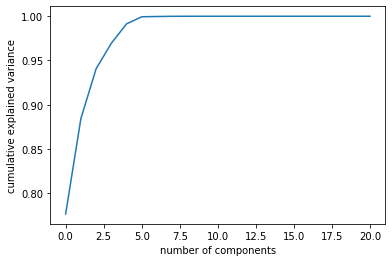

In [159]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# PIPELINE

In [160]:
pipelineModel = Pipeline([("scl", MinMaxScaler()), ("pca", PCA(8)),('dt', DecisionTreeClassifier())])

param = {
        "dt__criterion" : ["entropy"],
        "dt__splitter" : ["random"],
        "pca__n_components" : [1, 5, 10, 20]
}

search = RandomizedSearchCV(pipelineModel, param_distributions = param, n_jobs=-1)
search.fit(X_train, y_train)

y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))
print(search.best_params_)

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

In [ ]:
pipelineModel = Pipeline([("scl", MinMaxScaler()), ("pca", PCA(8)),('knn', KNeighborsClassifier())])
 
param = {
        "knn__n_neighbors" : [1,3,5,8, 10, 20],
        "pca__n_components" : [1, 5, 10, 20]
}

search = RandomizedSearchCV(pipelineModel, param_distributions = param, n_jobs=-1)
search.fit(X_train, y_train)

y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))
print(search.best_params_)

# Genetic Algoritm

In [ ]:
estimator = DecisionTreeClassifier()

selector = GeneticSelectionCV(estimator,
                                cv = 10,
                                verbose = 1,
                                scoring = "accuracy",
                                max_features = 8,
                                n_population = 50,
                                crossover_proba = 0.5,
                                mutation_proba = 0.1,
                                n_generations = 100,
                                crossover_independent_proba = 0.5,
                                mutation_independent_proba = 0.05,
                                tournament_size = 10,
                                n_gen_no_change = 5,
                                caching = True,
                                n_jobs = -1)
selector = selector.fit(X_train, y_train)

print(confusion_matrix(y_test, selector.predict(X_test)))
print(classification_report(y_test, selector.predict(X_test)))

# Dados SENAI

# SEM PCA

In [ ]:
dfSenai = pd.read_csv("./senai_inep.csv")

In [ ]:
dfSenai.drop(["CO_IES", "NO_IES", "CO_CURSO", "ID_ALUNO", "DT_INGRESSO_CURSO"], inplace = True, axis = 1)
le = LabelEncoder()
dfSenai["NO_CURSO"] = le.fit_transform(dfSenai["NO_CURSO"])

dfSenaiZeros = dfSenai.loc[dfSenai["TP_SITUACAO"] == 0]
dfSenaiUns = dfSenai.loc[dfSenai["TP_SITUACAO"] == 1]
dfSenaiUns = dfSenaiUns.iloc[:427]
dfSenai = pd.concat([dfSenaiZeros, dfSenaiUns])

X = dfSenai.drop(["TP_SITUACAO"], axis = 1)
y = dfSenai["TP_SITUACAO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [165]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[84 11]
 [ 3 73]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        95
           1       0.87      0.96      0.91        76

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [166]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[85 10]
 [ 5 71]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        95
           1       0.88      0.93      0.90        76

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [167]:
rl = LogisticRegression(multi_class='multinomial',solver='lbfgs')
rl.fit(X_train, y_train)
y_pred = rl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[89  6]
 [ 6 70]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.92      0.92      0.92        76

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [168]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 16]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        95
           1       0.82      0.97      0.89        76

    accuracy                           0.89       171
   macro avg       0.90      0.90      0.89       171
weighted avg       0.91      0.89      0.89       171



# COM PCA

Text(0, 0.5, 'Acc')

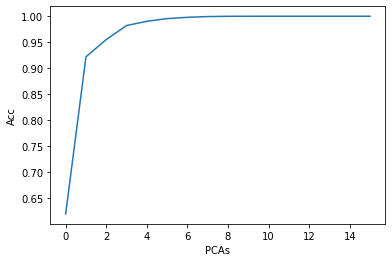

In [169]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCAs")
plt.ylabel("Acc")

In [170]:
dfSenai = pd.read_csv("./senai_inep.csv")

In [171]:
dfSenai.drop(["CO_IES", "NO_IES", "CO_CURSO", "ID_ALUNO", "DT_INGRESSO_CURSO"], inplace = True, axis = 1)
le = LabelEncoder()
dfSenai["NO_CURSO"] = le.fit_transform(dfSenai["NO_CURSO"])

dfSenaiZeros = dfSenai.loc[dfSenai["TP_SITUACAO"] == 0]
dfSenaiUns = dfSenai.loc[dfSenai["TP_SITUACAO"] == 1]
dfSenaiUns = dfSenaiUns.iloc[:427]
dfSenai = pd.concat([dfSenaiZeros, dfSenaiUns])

X = dfSenai.drop(["TP_SITUACAO"], axis = 1)
y = dfSenai["TP_SITUACAO"]


In [172]:
pca = PCA(8).fit(X)
XPCA = pca.transform(X)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(XPCA, y, test_size = 0.2)

In [174]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.79      0.93      0.86        73
           1       0.94      0.82      0.87        98

    accuracy                           0.87       171
   macro avg       0.87      0.87      0.86       171
weighted avg       0.88      0.87      0.87       171



In [175]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[61 12]
 [10 88]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        73
           1       0.88      0.90      0.89        98

    accuracy                           0.87       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.87      0.87      0.87       171



In [176]:
rl = LogisticRegression()
rl.fit(X_train, y_train)
y_pred = rl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[66  7]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.93      0.95      0.94        98

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [177]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61 12]
 [13 85]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        73
           1       0.88      0.87      0.87        98

    accuracy                           0.85       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.85      0.85      0.85       171



# OneHotEncoding

In [178]:
dfVeltec = pd.read_csv("./vigencias_scores.csv")

dfVeltec = dfVeltec.drop(["id_vei", "id_uo_vei", "id_motorista", "id_uo_motorista", "score_geral"], axis = 1)

dfVeltec["rank"].unique()
dfVeltec["rank"].value_counts()

dfVeltecOtimo = dfVeltec.loc[dfVeltec["rank"] == "otimo"]
dfVeltecBom = dfVeltec.loc[dfVeltec["rank"] == "bom"]
dfVeltecRegular = dfVeltec.loc[dfVeltec["rank"] == "regular"]
dfVeltecRuim = dfVeltec.loc[dfVeltec["rank"] == "ruim"]
dfVeltecPessimo = dfVeltec.loc[dfVeltec["rank"] == "pessimo"]

dfVeltecOtimo = dfVeltecOtimo.iloc[:592]
dfVeltecBom = dfVeltecBom.iloc[:592]
dfVeltecRegular = dfVeltecRegular.iloc[:592]
dfVeltecRuim = dfVeltecRuim.iloc[:592]
dfVeltecPessimo = dfVeltecPessimo.iloc[:592]

dfVeltec = pd.concat([dfVeltecOtimo, dfVeltecBom, dfVeltecRegular, dfVeltecRuim, dfVeltecPessimo])

X = dfVeltec.drop(["rank"], axis = 1)
y = dfVeltec["rank"]

In [179]:
dfNewVeltec = pd.concat([dfVeltec, pd.get_dummies(dfVeltec["rank"], prefix = "rank")], axis=1)
dfNewVeltec.drop(["rank"], axis = 1, inplace = True)

In [180]:
dfVeltec["rank"].value_counts()

regular    592
bom        592
ruim       592
otimo      592
pessimo    592
Name: rank, dtype: int64

In [181]:
X = dfNewVeltec.drop(["rank_otimo", "rank_bom","rank_pessimo", "rank_regular", "rank_ruim"], axis = 1)
y = dfNewVeltec[["rank_otimo", "rank_bom","rank_pessimo", "rank_regular", "rank_ruim"]]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# SEM PCA

In [183]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[[472   9]
  [  9 102]]

 [[439  29]
  [ 25  99]]

 [[456  13]
  [ 24  99]]

 [[439  26]
  [ 35  92]]

 [[448  37]
  [ 21  86]]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       111
           1       0.77      0.80      0.79       124
           2       0.88      0.80      0.84       123
           3       0.78      0.72      0.75       127
           4       0.70      0.80      0.75       107

   micro avg       0.81      0.81      0.81       592
   macro avg       0.81      0.81      0.81       592
weighted avg       0.81      0.81      0.81       592
 samples avg       0.81      0.81      0.81       592



In [184]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[[456  25]
  [ 16  95]]

 [[420  48]
  [ 44  80]]

 [[435  34]
  [ 62  61]]

 [[442  23]
  [ 76  51]]

 [[432  53]
  [ 55  52]]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       111
           1       0.62      0.65      0.63       124
           2       0.64      0.50      0.56       123
           3       0.69      0.40      0.51       127
           4       0.50      0.49      0.49       107

   micro avg       0.65      0.57      0.61       592
   macro avg       0.65      0.58      0.60       592
weighted avg       0.65      0.57      0.60       592
 samples avg       0.57      0.57      0.57       592



# COM PCA

Text(0, 0.5, 'Acc')

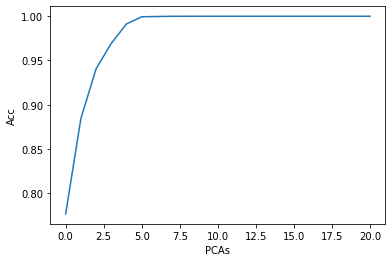

In [185]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCAs")
plt.ylabel("Acc")

In [186]:
dfVeltec = pd.read_csv("./vigencias_scores.csv")

dfVeltec = dfVeltec.drop(["id_vei", "id_uo_vei", "id_motorista", "id_uo_motorista", "score_geral"], axis = 1)

dfVeltec["rank"].unique()
dfVeltec["rank"].value_counts()

dfVeltecOtimo = dfVeltec.loc[dfVeltec["rank"] == "otimo"]
dfVeltecBom = dfVeltec.loc[dfVeltec["rank"] == "bom"]
dfVeltecRegular = dfVeltec.loc[dfVeltec["rank"] == "regular"]
dfVeltecRuim = dfVeltec.loc[dfVeltec["rank"] == "ruim"]
dfVeltecPessimo = dfVeltec.loc[dfVeltec["rank"] == "pessimo"]

dfVeltecOtimo = dfVeltecOtimo.iloc[:592]
dfVeltecBom = dfVeltecBom.iloc[:592]
dfVeltecRegular = dfVeltecRegular.iloc[:592]
dfVeltecRuim = dfVeltecRuim.iloc[:592]
dfVeltecPessimo = dfVeltecPessimo.iloc[:592]

dfVeltec = pd.concat([dfVeltecOtimo, dfVeltecBom, dfVeltecRegular, dfVeltecRuim, dfVeltecPessimo])

X = dfVeltec.drop(["rank"], axis = 1)
y = dfVeltec["rank"]

pca = PCA(8).fit(X)
XPCA = pca.transform(X)

dfNewVeltec = pd.concat([dfVeltec, pd.get_dummies(dfVeltec["rank"], prefix = "rank")], axis=1)
dfNewVeltec.drop(["rank"], axis = 1, inplace = True)

X = dfNewVeltec.drop(["rank_otimo", "rank_bom","rank_pessimo", "rank_regular", "rank_ruim"], axis = 1)
y = dfNewVeltec[["rank_otimo", "rank_bom","rank_pessimo", "rank_regular", "rank_ruim"]]

X_train, X_test, y_train, y_test = train_test_split(XPCA, y, test_size = 0.2)

In [187]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[[426  55]
  [ 32  79]]

 [[424  32]
  [ 84  52]]

 [[431  52]
  [ 55  54]]

 [[442  42]
  [ 76  32]]

 [[428  36]
  [ 73  55]]]
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       111
           1       0.62      0.38      0.47       136
           2       0.51      0.50      0.50       109
           3       0.43      0.30      0.35       108
           4       0.60      0.43      0.50       128

   micro avg       0.56      0.46      0.50       592
   macro avg       0.55      0.46      0.49       592
weighted avg       0.56      0.46      0.49       592
 samples avg       0.46      0.46      0.46       592



In [188]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(multilabel_confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[[444  37]
  [ 36  75]]

 [[404  52]
  [ 61  75]]

 [[434  49]
  [ 45  64]]

 [[421  63]
  [ 45  63]]

 [[424  40]
  [ 54  74]]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       111
           1       0.59      0.55      0.57       136
           2       0.57      0.59      0.58       109
           3       0.50      0.58      0.54       108
           4       0.65      0.58      0.61       128

   micro avg       0.59      0.59      0.59       592
   macro avg       0.60      0.60      0.59       592
weighted avg       0.60      0.59      0.59       592
 samples avg       0.59      0.59      0.59       592

